In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
import sys

In [ ]:
# suppressing warning messages
warnings.filterwarnings('ignore')

In [ ]:
# importing scripts
sys.path.insert(1, '../scripts')

from data_viz import Data_Viz
from data_cleaning import DataCleaner
from data_transformation import DataTransformer

DV = Data_Viz("../logs/data_exp_notebook.log")
DC = DataCleaner("../logs/data_exp_notebook.log")
DT = DataTransformer("../logs/data_exp_notebook.log")

In [ ]:
# loading dataset

test = pd.read_csv("../data/test_store.csv")
train = pd.read_csv("../data/train_store.csv")

# Univariate Analysis

### Comparing distribution of the test and train dataset

In [ ]:
sample_train = train.sample(n=41088, random_state= 5)
promo_total = sample_train.shape[0]
promo_yes = sample_train.loc[sample_train["Promo2"] ==1].shape[0]
promo_per = (promo_yes/promo_total)

print(promo_per, promo_total, promo_yes)

In [ ]:
DV.binom_distribution(promo_yes, promo_total, promo_per)

In [ ]:
promo_total_t = test.shape[0]
promo_yes_t = test.loc[test["Promo2"] ==1].shape[0]
promo_per_t = (promo_yes_t/promo_total_t)

print(promo_per_t, promo_total_t, promo_yes_t)

In [ ]:
DV.binom_distribution(promo_yes_t, promo_total_t, promo_per_t)

In [ ]:
DV.compare_binom_dist(promo_yes, promo_yes_t, promo_total, promo_total_t, promo_per, promo_per_t)

**Observation**
- Both the test dataset and the train dataset have quite close distributions

# Bivariate Analysis

### Sales and Holidays

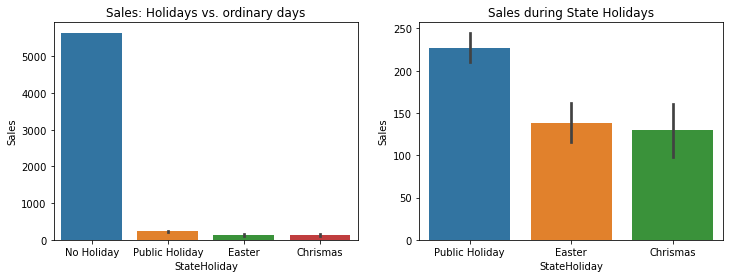

In [45]:
# comparing holiday day sales with non Holiday ones

holidays = train.loc[train["StateHoliday"] != 'No Holiday']

titles = ['Sales: Holidays vs. ordinary days', 'Sales during State Holidays']
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(12,4))
sns.barplot(x="StateHoliday", y="Sales", data=train, ax=axis1).set_title(titles[0])
sns.barplot(x="StateHoliday", y="Sales", data=holidays, ax=axis2).set_title(titles[1])
plt.show()

In [ ]:
# seasonality check
plt.figure(figsize=(8,8))
sns.barplot(x='Month', y='Sales', data=train)
plt.show()

In [ ]:
train["Date"] = pd.to_datetime(train["Date"])
DV.summ_columns(train)

In [ ]:
# easter's time sale in 2013

train_filter = train[["Sales", "Date"]]
date_plot = train_filter.groupby(["Date"]).agg({"Sales": "mean"})

plt.figure(figsize=(15, 3))
sns.lineplot(x="Date", y="Sales", data=date_plot)
plt.axvline(pd.Timestamp('2013-03-31'),color='r')
plt.axvline(pd.Timestamp('2014-04-20'),color='r')
plt.axvline(pd.Timestamp('2015-04-05'),color='r')
plt.axvline(pd.Timestamp('2013-12-25'),color='y')
plt.axvline(pd.Timestamp('2014-12-25'),color='y')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(xlabel="Date", fontsize=16)
plt.ylabel(ylabel="Sales", fontsize=16)
plt.show()



**Observations**
- comparing no holidays vs. state holidays the purchase during no holidays is more
- comparing the purchase behavior between state holidays: public holidays have more purchase, while christmas has the least

### Sales and Customers

In [ ]:
sales_customers = train[['Sales', 'Customers']]
plt.figure(figsize=(10,9))
sns.heatmap(sales_customers.corr(), linewidths=0.1, vmax=1.0, 
            square=True, cmap=plt.cm.RdBu, linecolor='white', annot=True)

**Observation**
- There is a very high correlation between customers number and salesmm

### Weekend Sales

In [ ]:
# stores that are open on weekends

closed_stores_df = train.loc[((train["Open"] == 0) & (train["weekday"] == 0))]

closed_stores = closed_stores_df["Store"].value_counts().index.to_list()
stores_lis = train["Store"].value_counts().index.to_list()
open_stores = []

for x in stores_lis: 
    if (x not in closed_stores):
        open_stores.append(x)

print(len(stores_lis), len(closed_stores))

open_stores




In [ ]:
open_stores_df = train.loc[train["Store"].isin(open_stores)]
closed_stores_df = train.loc[train["Store"].isin(closed_stores)]

# sales in the weekend

print("per-store sales for open stores: ", (open_stores_df["Sales"].mean()))
print("Per-store sales for closed stores: ", (closed_stores_df["Sales"].mean()))

sales_weekday = {"Stores":["Open", "Closed"], "Sales":[open_stores_df["Sales"].mean(), closed_stores_df["Sales"].mean()]}
plt.figure(figsize=(8,8))
sns.barplot(x = "Stores", y = "Sales", data= pd.DataFrame(sales_weekday))

**Observation**
- There are 10 Stores that are open on all weekdays
- Those that are open on week days have better sale than those that aren't


### Promotion and Sales

In [ ]:
# salses count during promotion and without

plt.figure(figsize=(8, 8))
sns.barplot(x="Promo", y="Sales", data=train)


**Observation**
- Promotion Does affect sales as shown in the above plot

### Promos and Customers

In [ ]:
# checking average number of customers and existence of promotion

plt.figure(figsize=(8, 8))
sns.barplot(x="Promo", y="Customers", data=train)


**Observation**
- Promotion increases number of customersm

### Assortment, customers, and Sales

In [ ]:

fig, (axi1, axi2) = plt.subplots(1, 2, figsize=(15,5))
sns.barplot(x="Assortment", y="Sales", data=train, ax=axi1).set_title("Salses per Assortment")
sns.barplot(x="Assortment", y="Customers", data=train, ax=axi2).set_title("Customers number per Assorttment")
plt.show()

**Observation**
- the 'b' assortment also called the extra class have the highest customer and sales.

### Promo deployment need

In [ ]:
table = train.groupby(["StoreType"]).agg({"Promo": 'mean', "Sales": "mean"}).reset_index()
table

In [ ]:
fig, (axi1, axi2) = plt.subplots(1, 2, figsize=(15,5))
sns.barplot(x="StoreType", y="Promo", data=table, ax=axi1).set_title("promotion by store type")
sns.barplot(x="StoreType", y="Sales", data=table, ax=axi2).set_title("Sales by store type")
plt.show()

**Observation**
- promotion distribution accross the storeTypes is similar. but D is slightly lower
- So promos can be deployed more in d type stores but also in a and c.

### Competition distance and sales

In [ ]:
table2 = train.groupby("Store").agg({"CompetitionDistance": 'mean', "Sales": 'mean'})
plt.figure(figsize=(8,8))
sns.scatterplot(x="Sales", y="CompetitionDistance", data=table2).set_title("competition distance per sale")
plt.show()

plt.figure(figsize=(10,8))
sns.heatmap(table2.corr(), annot=True)
plt.show()

**Observation**
- There is almost no significant positive or negative correlation between competition distance and salesm

In [ ]:
###